# Principal Component Analysis with Cancer Data

In [175]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [375]:
# Load Data 
# Added column Titles from file "breast-cancer-wisconsin (1).names" from URL - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
#(2 for benign, 4 for malignant)

c_df = pd.read_csv("breast-cancer-wisconsin.data.txt",sep=',',names=["Sample code number", "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"] )  
c_df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [376]:
c_df = c_df.rename(columns={'Bare Nuclei': 'Bare_Nuclei'})

In [377]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [378]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [379]:
c_df.shape

(699, 11)

In [380]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [381]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [382]:
c_df['Sample code number'].unique()

array([ 1000025,  1002945,  1015425,  1016277,  1017023,  1017122,
        1018099,  1018561,  1033078,  1035283,  1036172,  1041801,
        1043999,  1044572,  1047630,  1048672,  1049815,  1050670,
        1050718,  1054590,  1054593,  1056784,  1057013,  1059552,
        1065726,  1066373,  1066979,  1067444,  1070935,  1071760,
        1072179,  1074610,  1075123,  1079304,  1080185,  1081791,
        1084584,  1091262,  1096800,  1099510,  1100524,  1102573,
        1103608,  1103722,  1105257,  1105524,  1106095,  1106829,
        1108370,  1108449,  1110102,  1110503,  1110524,  1111249,
        1112209,  1113038,  1113483,  1113906,  1115282,  1115293,
        1116116,  1116132,  1116192,  1116998,  1117152,  1118039,
        1120559,  1121732,  1121919,  1123061,  1124651,  1125035,
        1126417,  1131294,  1132347,  1133041,  1133136,  1136142,
        1137156,  1143978,  1147044,  1147699,  1147748,  1148278,
        1148873,  1152331,  1155546,  1156272,  1156948,  1157

In [383]:
#c_df["ID"].value_counts()
c_df["Sample code number"].value_counts()
c_df["Clump Thickness"].value_counts()
c_df["Uniformity of Cell Size"].value_counts()
c_df["Uniformity of Cell Shape"].value_counts()
c_df["Marginal Adhesion"].value_counts()
c_df["Single Epithelial Cell Size"].value_counts()
c_df["Bare_Nuclei"].value_counts()
c_df["Bland Chromatin"].value_counts()
c_df["Normal Nucleoli"].value_counts()
c_df["Mitoses"].value_counts()
c_df["Class"].value_counts()

1182404    6
1276091    5
1198641    3
466906     2
1116116    2
1070935    2
385103     2
1293439    2
1240603    2
1277792    2
1168736    2
560680     2
1174057    2
822829     2
320675     2
897471     2
1114570    2
1339781    2
654546     2
704097     2
1017023    2
734111     2
1354840    2
769612     2
411453     2
1158247    2
1321942    2
1061990    2
733639     2
1218860    2
          ..
1096352    1
255644     1
1201870    1
1169049    1
1041043    1
1190546    1
1071760    1
797327     1
1293966    1
1214092    1
1184241    1
432809     1
1201834    1
1125035    1
888523     1
1182410    1
640712     1
1018561    1
1336798    1
1091262    1
1173216    1
1286943    1
1319609    1
1172152    1
558538     1
1207986    1
1302428    1
857774     1
1181356    1
625201     1
Name: Sample code number, Length: 645, dtype: int64

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64

1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Uniformity of Cell Shape, dtype: int64

1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64

2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single Epithelial Cell Size, dtype: int64

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland Chromatin, dtype: int64

1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: Normal Nucleoli, dtype: int64

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

2    458
4    241
Name: Class, dtype: int64

In [384]:
# from above analysis 16 ? are there in Bare Nuclei column

In [385]:
c_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [386]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [387]:
#checking nulls in dataframe
c_df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare_Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [388]:
#missing values across columns
c_df.isnull().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare_Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [389]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [390]:
c_df["Bare_Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [391]:
#Conclusion : there is 16 ? values

In [392]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [393]:
#c_df=c_df[c_df.Bare_Nuclei!="?"]

In [394]:
#c_df.count()

In [395]:
# there are 16 ?, Imputing with Mode which 1
c_df.replace(to_replace='?',value=1,inplace=True)

In [396]:
c_df.count()

Sample code number             699
Clump Thickness                699
Uniformity of Cell Size        699
Uniformity of Cell Shape       699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare_Nuclei                    699
Bland Chromatin                699
Normal Nucleoli                699
Mitoses                        699
Class                          699
dtype: int64

In [397]:
c_df["Bare_Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [398]:
# Convert Bare_Nuclei COlumn dtype to integer

In [399]:
c_df = c_df.astype({"Bare_Nuclei": int})

In [400]:
c_df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare_Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [401]:
#No values are found as corrupted

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [402]:
# Check for correlation of variable

In [403]:
#as Class is target column, drop Class column

In [404]:
c_df=c_df.drop(['Class'], axis = 1)

In [405]:
c_df.corr()    

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare_Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Sample code number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101
Bare_Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000


In [406]:
corr = c_df.corr()
corr.style.background_gradient()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare_Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Sample code number,1,-0.0553084,-0.0416033,-0.0415761,-0.0648781,-0.0455283,-0.0925327,-0.0600505,-0.052072,-0.0349007
Clump Thickness,-0.0553084,1,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
Uniformity of Cell Size,-0.0416033,0.644913,1,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693
Uniformity of Cell Shape,-0.0415761,0.654589,0.906882,1,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911
Marginal Adhesion,-0.0648781,0.486356,0.705582,0.683079,1,0.599599,0.666971,0.666715,0.603352,0.417633
Single Epithelial Cell Size,-0.0455283,0.521816,0.751799,0.719668,0.599599,1,0.583701,0.616102,0.628881,0.479101
Bare_Nuclei,-0.0925327,0.590008,0.686673,0.707474,0.666971,0.583701,1,0.674215,0.574778,0.342397
Bland Chromatin,-0.0600505,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1,0.665878,0.344169
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1,0.428336
Mitoses,-0.0349007,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1


#Conclusion

Highly correlated variables are 
1. Uniformity of Cell Shape || Uniformity of Cell Size,Single Epithelial Cell Size, Bland Chromatin
2. Uniformity of Cell Size || Single Epithelial Cell Size , Bland Chromatin, Normal Nucleoli


In [407]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [408]:
#Let us check for pair plots

In [409]:
# I am including CLass and hence reimporting

In [410]:
c_df1=pd.read_csv("breast-cancer-wisconsin.data.txt",sep=',',names=["Sample code number", "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"] )  
c_df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare_Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1
5,1017122,8,10,10,8,7,10,9,7,1
6,1018099,1,1,1,1,2,10,3,1,1
7,1018561,2,1,2,1,2,1,3,1,1
8,1033078,2,1,1,1,2,1,1,1,5
9,1033078,4,2,1,1,2,1,2,1,1


C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


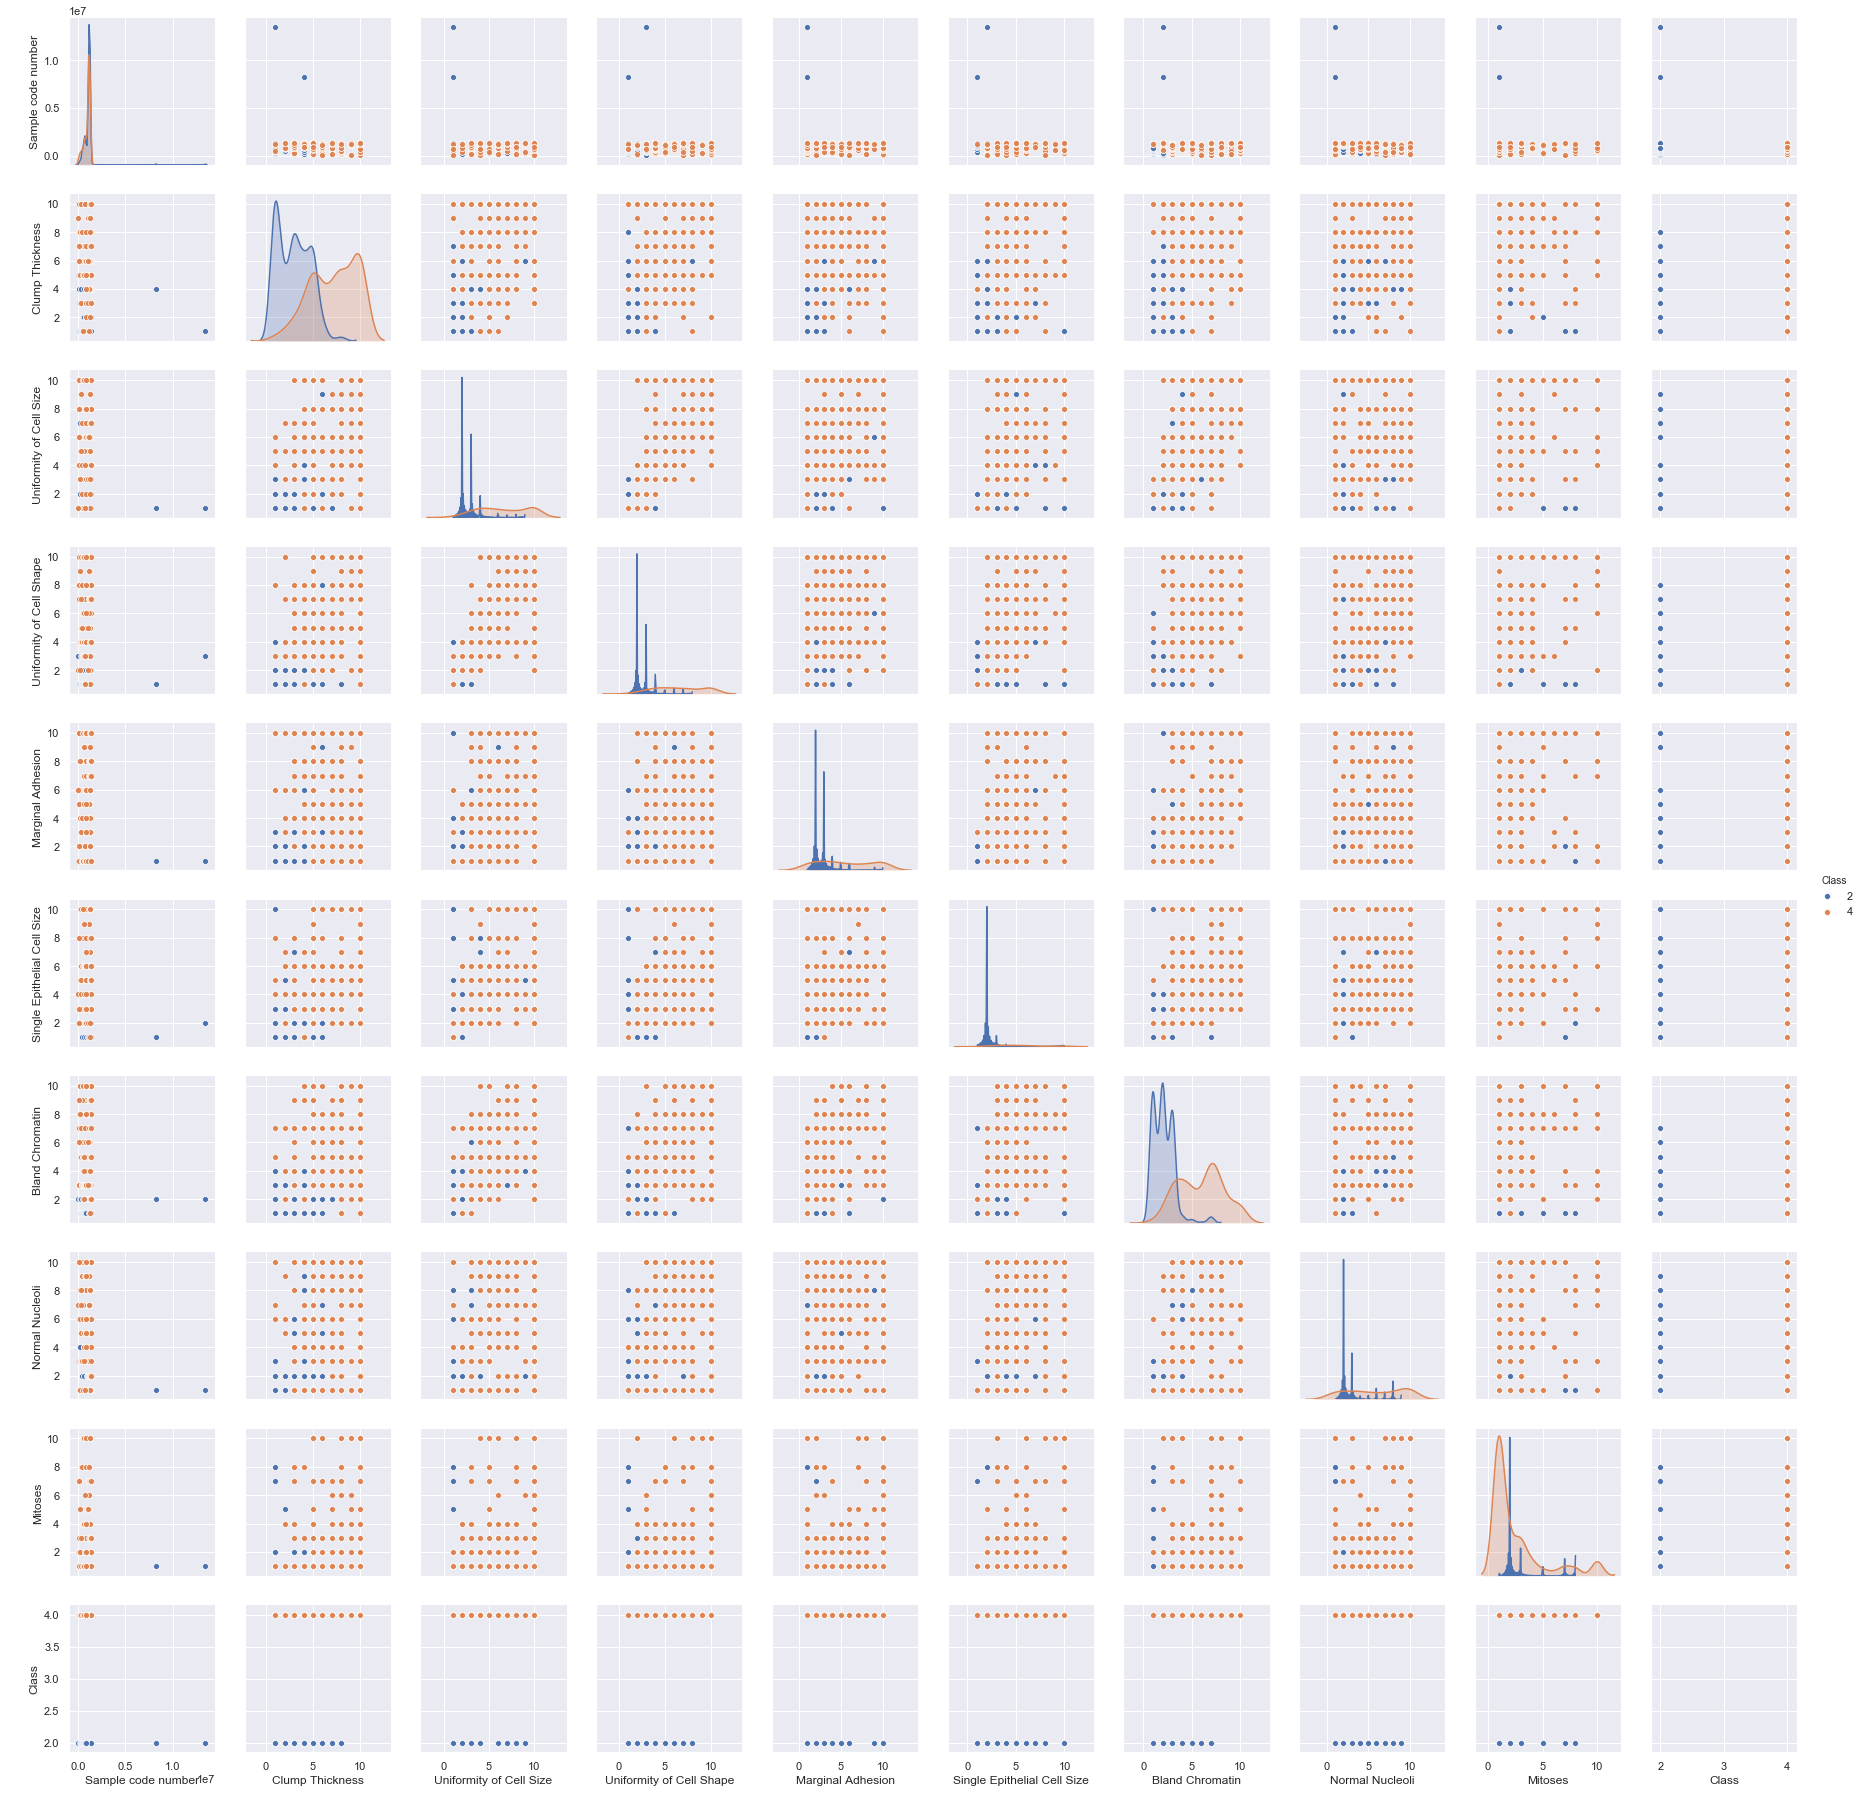

In [411]:
sns.pairplot(c_df1, hue='Class')

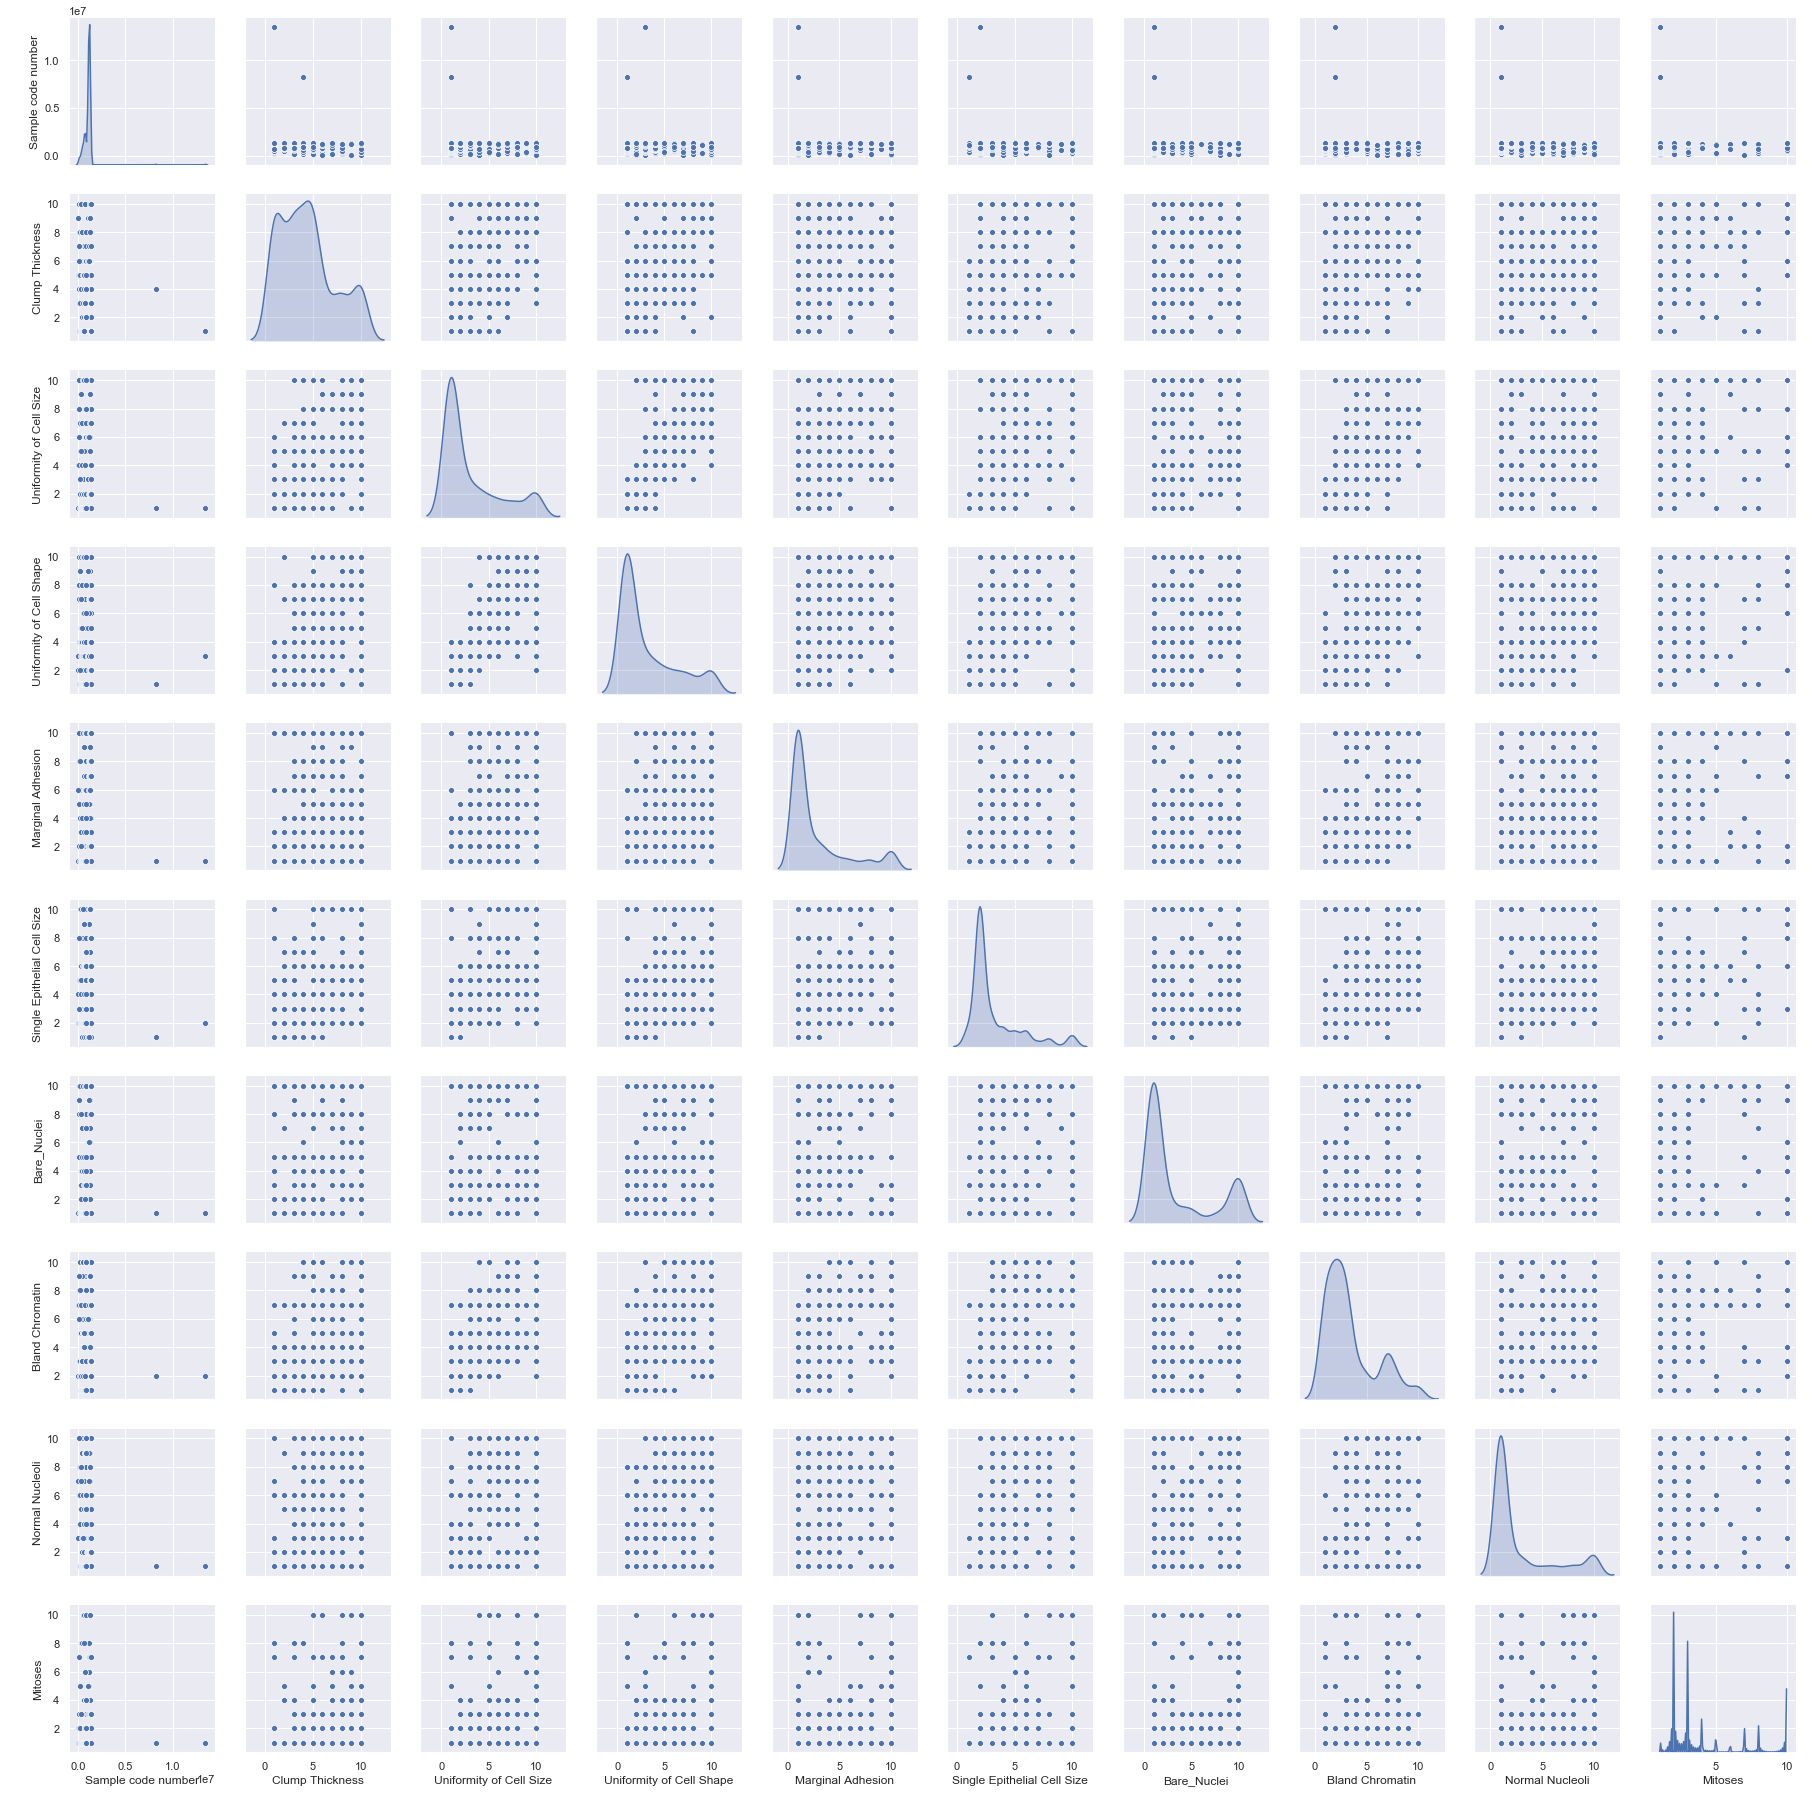

In [412]:
# pairplot without target variable = Çlass
sns.pairplot(c_df,diag_kind='kde')

In [413]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [414]:
# We could see most of the outliers are now removed.

In [415]:
c_df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare_Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
dtype: object

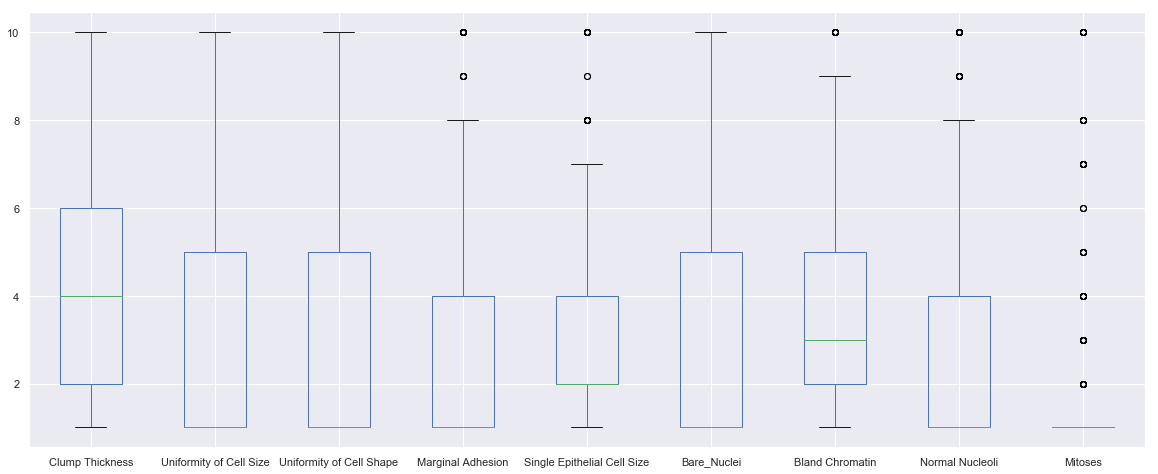

In [416]:
#outliers
sns.set(rc={'figure.figsize':(20,8)})
c_df[[ "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare_Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses"]].plot(kind='box')

In [418]:
numeric_cols = list(c_df.select_dtypes(['float64','int64']).columns)
numeric_cols

['Sample code number',
 'Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

In [419]:
X = c_df[numeric_cols]

In [420]:
## Finding ouliers
from itertools import chain
outlier_rec = []
# For each predictors find outliers using mathematical function.
def find_outlier(df_in, col_name, verbose=False):
    q25 = df_in[col_name].quantile(0.25)
    q75 = df_in[col_name].quantile(0.75)
    iqr = q75-q25 #Interquartile range
    lower, upper  = q25-1.5*iqr, q75+1.5*iqr
    outliers_df = df_in[(df_in[col_name] < lower) | (df_in[col_name] > upper)]
    outliers_removed_df = df_in[(c_df[col_name] >= lower) & (df_in[col_name] <= upper)]
    
    if(verbose):
        print('# Number of outliers / non-outliers for column \'{}\': {} /{}'.format(
            col_name, outliers_df.shape[0], outliers_removed_df.shape[0]))
    return outliers_df.index.tolist();

for feature in numeric_cols:
    outlier_rec.append(find_outlier(c_df, feature, True))
    
outlier_rec = list(chain.from_iterable(outlier_rec))
outlier_rec = list(set(outlier_rec)) 
#outlier_rec.sort()
print('# Total outliers in the dataset: {}'.format(len(outlier_rec)))
print(outlier_rec)

# Number of outliers / non-outliers for column 'Sample code number': 23 /676
# Number of outliers / non-outliers for column 'Clump Thickness': 0 /699
# Number of outliers / non-outliers for column 'Uniformity of Cell Size': 0 /699
# Number of outliers / non-outliers for column 'Uniformity of Cell Shape': 0 /699
# Number of outliers / non-outliers for column 'Marginal Adhesion': 60 /639
# Number of outliers / non-outliers for column 'Single Epithelial Cell Size': 54 /645
# Number of outliers / non-outliers for column 'Bland Chromatin': 20 /679
# Number of outliers / non-outliers for column 'Normal Nucleoli': 77 /622
# Number of outliers / non-outliers for column 'Mitoses': 120 /579
# Total outliers in the dataset: 208
[514, 515, 8, 523, 14, 529, 530, 18, 20, 21, 32, 546, 36, 549, 38, 40, 41, 42, 43, 44, 45, 553, 49, 50, 52, 565, 53, 54, 56, 569, 570, 571, 572, 60, 62, 63, 57, 65, 67, 68, 582, 71, 73, 586, 74, 588, 590, 84, 85, 87, 603, 604, 605, 608, 610, 99, 611, 612, 98, 100, 104, 105

In [421]:
#based on above analysis, I am planning to treat outliers for column where outlier count is  greater than 50 per column 
# Columns to be treated are - Mitoses, Normal Nucleoli, Marginal Adhesion, Single Epithelial Cell Size

In [422]:
# Treatment for Mitoses 

In [423]:
pd.crosstab(c_df1["Mitoses"], c_df1[ "Class"])                 

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [424]:
# based on crosstab evaluation, values for Mitosis class for values  5, 6, 7, 8,10 can be combined with Mitosis value 4
c_df['Mitoses']=np.where(c_df['Mitoses']>4,4,c_df['Mitoses'])

In [425]:
c_df["Mitoses"].value_counts()

1    579
4     52
2     35
3     33
Name: Mitoses, dtype: int64

In [426]:
# Treatment for Normal Nucleoli

In [427]:
pd.crosstab(c_df1["Normal Nucleoli"], c_df1[ "Class"]) 

Class,2,4
Normal Nucleoli,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [428]:
# based on crosstab evaluation, values for Normal Nucleoli class for values  5, 6, 7, 8,10 can be combined with Normal Nucleoli value 4
c_df['Normal Nucleoli']=np.where(c_df['Normal Nucleoli']>4,4,c_df['Normal Nucleoli'])


In [429]:
c_df["Normal Nucleoli"].value_counts()

1    443
4    176
3     44
2     36
Name: Normal Nucleoli, dtype: int64

In [430]:
# Treatment for Marginal Adhesion

In [431]:
pd.crosstab(c_df1["Marginal Adhesion"], c_df1[ "Class"]) 

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [432]:
# based on crosstab evaluation, values for Marginal Adhesion class for values  5, 6, 7, 8,10 can be combined with Marginal Adhesion value 4
c_df['Marginal Adhesion']=np.where(c_df['Marginal Adhesion']>4,4,c_df['Marginal Adhesion'])

In [433]:
c_df["Marginal Adhesion"].value_counts()

1    407
4    176
3     58
2     58
Name: Marginal Adhesion, dtype: int64

In [434]:
# Treatment for Single Epithelial Cell Size

In [435]:
pd.crosstab(c_df1["Single Epithelial Cell Size"], c_df1[ "Class"]) 

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [436]:
# based on crosstab evaluation, values for Single Epithelial Cell Size class for values  5, 6, 7, 8,10 can be combined with Single Epithelial Cell Size value 4
c_df['Single Epithelial Cell Size']=np.where(c_df['Single Epithelial Cell Size']>4,4,c_df['Single Epithelial Cell Size'])

In [437]:
c_df["Single Epithelial Cell Size"].value_counts()

2    386
4    194
3     72
1     47
Name: Single Epithelial Cell Size, dtype: int64

In [438]:
c_df.count()

Sample code number             699
Clump Thickness                699
Uniformity of Cell Size        699
Uniformity of Cell Shape       699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare_Nuclei                    699
Bland Chromatin                699
Normal Nucleoli                699
Mitoses                        699
dtype: int64

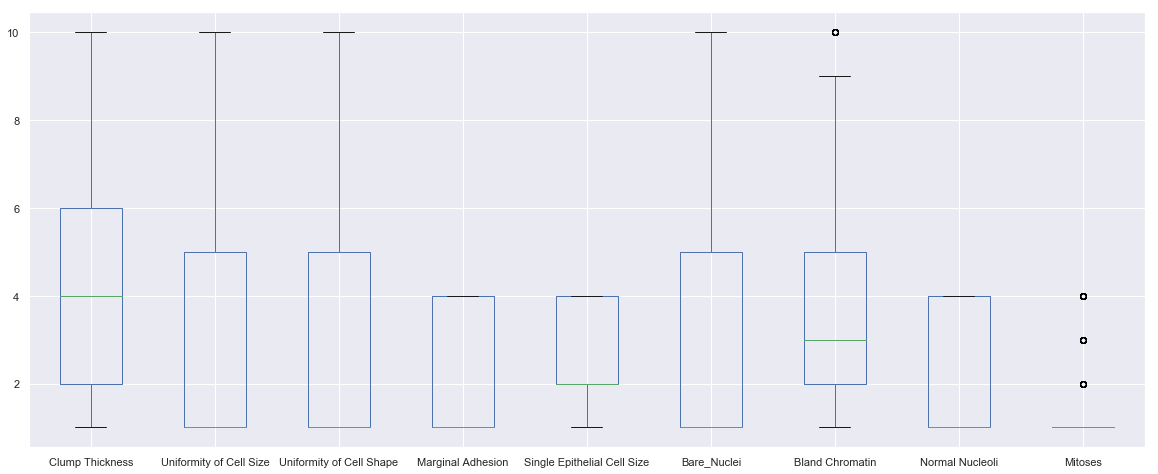

In [439]:
#Post treatment of Outliers
sns.set(rc={'figure.figsize':(20,8)})
c_df[[ "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare_Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses"]].plot(kind='box')

In [440]:
#standarization 
from scipy.stats import zscore

In [441]:
#DROP ID coloumn titled, Sample code number
c_df=c_df.drop(['Sample code number'], axis = 1)

In [444]:
c_df.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare_Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,4,10,3,2,1
2,3,1,1,1,2,2,3,1,1


In [446]:
c_df_z = c_df.apply(zscore)

In [447]:
c_df_z.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,1.655011e-16,1.000716,-1.214667,-0.859266,-0.148465,0.562336,1.983939
Uniformity of Cell Size,699.0,-2.801765e-16,1.000716,-0.699995,-0.699995,-0.699995,0.611792,2.251526
Uniformity of Cell Shape,699.0,-5.854481e-16,1.000716,-0.743299,-0.743299,-0.743299,0.603599,2.287222
Marginal Adhesion,699.0,2.363393e-16,1.000716,-0.776593,-0.776593,-0.776593,1.543230,1.543230
Single Epithelial Cell Size,699.0,-2.811294e-16,1.000716,-1.648473,-0.612248,-0.612248,1.460203,1.460203
Bare_Nuclei,699.0,7.026648e-16,1.000716,-0.686979,-0.686979,-0.686979,0.418196,1.799664
Bland Chromatin,699.0,6.251556e-16,1.000716,-1.000471,-0.590067,-0.179662,0.641147,2.693171
Normal Nucleoli,699.0,3.360847e-16,1.000716,-0.715534,-0.715534,-0.715534,1.585807,1.585807
Mitoses,699.0,-7.712794e-16,1.000716,-0.418112,-0.418112,-0.418112,-0.418112,2.993489


# Q6 Create a covariance matrix for identifying Principal components

In [460]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [448]:
cov_matrix=np.cov(c_df_z.T)

In [449]:
cov_matrix

array([[1.00143266, 0.64583645, 0.65552689, 0.55151351, 0.58748529,
        0.5908535 , 0.5592282 , 0.57441661, 0.40800705],
       [0.64583645, 1.00143266, 0.90818117, 0.71521785, 0.77481515,
        0.68765657, 0.75680368, 0.72708042, 0.50781935],
       [0.65552689, 0.90818117, 1.00143266, 0.69734899, 0.7529968 ,
        0.70848734, 0.73700282, 0.7185753 , 0.47875736],
       [0.55151351, 0.71521785, 0.69734899, 1.00143266, 0.69249032,
        0.69254131, 0.67958027, 0.65284973, 0.41561735],
       [0.58748529, 0.77481515, 0.7529968 , 0.69249032, 1.00143266,
        0.68503965, 0.67885183, 0.72403296, 0.45777325],
       [0.5908535 , 0.68765657, 0.70848734, 0.69254131, 0.68503965,
        1.00143266, 0.67518063, 0.64035854, 0.43528712],
       [0.5592282 , 0.75680368, 0.73700282, 0.67958027, 0.67885183,
        0.67518063, 1.00143266, 0.66960502, 0.39349171],
       [0.57441661, 0.72708042, 0.7185753 , 0.65284973, 0.72403296,
        0.64035854, 0.66960502, 1.00143266, 0.47652503],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [457]:
eig_values,eig_vectors=np.linalg.eig(cov_matrix)

In [458]:
eig_values

array([6.11728118, 0.7029678 , 0.08889747, 0.49609297, 0.24804445,
       0.40073146, 0.34931059, 0.30117675, 0.30839132])

In [459]:
eig_vectors

array([[ 3.03334821e-01, -8.54981494e-03, -1.36082968e-02,
        -9.19373753e-01,  1.13542020e-01,  8.40421529e-02,
        -8.44912161e-02,  1.88116392e-01,  4.33500457e-04],
       [ 3.70775647e-01,  4.04927671e-02, -7.32356703e-01,
         1.81220577e-02, -2.08659811e-01, -3.39164186e-01,
         2.98535746e-01, -1.48352516e-01, -2.33468806e-01],
       [ 3.67409521e-01,  7.49521552e-02,  6.67606862e-01,
        -4.07001944e-02, -3.56207711e-01, -3.04277513e-01,
         3.03420741e-01, -2.51995670e-01, -1.92359788e-01],
       [ 3.35314453e-01,  1.62385028e-01,  3.81335880e-02,
         2.48435100e-01, -1.04417227e-01,  4.70007284e-01,
        -8.59442376e-02,  4.99341932e-01, -5.56311576e-01],
       [ 3.49944922e-01,  7.22723814e-02,  6.43938971e-02,
         1.43420192e-01,  7.04908321e-01, -1.60144060e-01,
        -3.58868759e-01, -3.69946348e-01, -2.43742449e-01],
       [ 3.35691762e-01,  1.09991792e-01, -8.56851421e-02,
         4.12634271e-02, -1.88120480e-01,  6.505423

# Q8 Find variance and cumulative variance by each eigen vector

In [470]:
#Variance
eig_values

array([6.11728118, 0.7029678 , 0.08889747, 0.49609297, 0.24804445,
       0.40073146, 0.34931059, 0.30117675, 0.30839132])

In [475]:
#Total Variance
tot=0
for i in eig_values:
    #print (i)
    tot=tot+i
print(tot)

9.012893982808023


In [482]:
# Variance %
Total_Var=(eig_values/tot)*100
Total_Var

array([67.87255224,  7.79957918,  0.98633655,  5.50425838,  2.75210656,
        4.44620182,  3.87567623,  3.34162087,  3.42166816])

In [481]:
Total_Var.cumsum()

array([ 67.87255224,  75.67213143,  76.65846798,  82.16272636,
        84.91483292,  89.36103473,  93.23671096,  96.57833184,
       100.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [537]:
# 100% of cumulative variance is taken as it is 
#array([ 67.87255224,  75.67213143,  76.65846798,  82.16272636,
#        84.91483292,  89.36103473,  93.23671096,  96.57833184,
#       100.        ])

pca = PCA(n_components=9)
pca.fit(c_df_z)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [538]:
#eigen Vector
pca.components_

array([[ 3.03334821e-01,  3.70775647e-01,  3.67409521e-01,
         3.35314453e-01,  3.49944922e-01,  3.35691762e-01,
         3.39127961e-01,  3.39459670e-01,  2.40201620e-01],
       [ 8.54981494e-03, -4.04927671e-02, -7.49521552e-02,
        -1.62385028e-01, -7.22723814e-02, -1.09991792e-01,
        -2.21403699e-01,  1.13519234e-02,  9.48593990e-01],
       [ 9.19373753e-01, -1.81220577e-02,  4.07001944e-02,
        -2.48435100e-01, -1.43420192e-01, -4.12634271e-02,
        -1.88242853e-01, -1.48499030e-01, -1.06243275e-01],
       [-8.40421529e-02,  3.39164186e-01,  3.04277513e-01,
        -4.70007284e-01,  1.60144060e-01, -6.50542329e-01,
         6.33645699e-02,  3.20642802e-01, -9.34590947e-02],
       [-8.44912161e-02,  2.98535746e-01,  3.03420741e-01,
        -8.59442376e-02, -3.58868759e-01, -1.42294749e-02,
         4.73340033e-01, -6.62316149e-01,  1.12180001e-01],
       [ 4.33500457e-04, -2.33468806e-01, -1.92359788e-01,
        -5.56311576e-01, -2.43742449e-01,  3.627537

In [539]:
#eigen Values
pca.explained_variance_

array([6.11728118, 0.7029678 , 0.49609297, 0.40073146, 0.34931059,
       0.30839132, 0.30117675, 0.24804445, 0.08889747])

In [540]:
#Transform data to components formed
X_pca = pca.transform(c_df_z)

In [541]:
X_pca.shape

(699, 9)

In [542]:
type(X_pca)

numpy.ndarray

# Q10 Find correlation between components and features

In [550]:
#ConvertX_pca into dataframe
dataset = pd.DataFrame({'Column1': X_pca[:, 0], 'Column2': X_pca[:, 1],'Column3': X_pca[:, 2],'Column4': X_pca[:, 3],'Column5': X_pca[:, 4],'Column6': X_pca[:, 5],'Column7': X_pca[:, 6],'Column8': X_pca[:, 7],'Column9': X_pca[:, 8] })
dataset.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
0,-1.579389,-0.033220,0.666271,0.031153,0.186210,0.269160,-0.265391,0.368918,0.012790
1,1.754806,-0.940061,-0.400524,-1.457931,-0.700140,-0.760538,0.868998,0.283688,0.060204
2,-1.702250,-0.069687,0.001378,-0.088850,0.242335,0.369078,0.013417,0.236235,0.026791
3,1.667672,-0.439741,0.522784,1.861715,-0.351186,0.191953,0.880041,-1.147769,0.159960
4,-1.168614,-0.287395,-0.044692,-0.665867,0.083321,-0.591357,-0.970792,0.167078,-0.051022


In [551]:
#alternate way for dataframe creation from array
dataset2=pd.DataFrame(data=X_pca)

In [552]:
dataset.corr

<bound method DataFrame.corr of       Column1   Column2   Column3   Column4   Column5   Column6   Column7  \
0   -1.579389 -0.033220  0.666271  0.031153  0.186210  0.269160 -0.265391   
1    1.754806 -0.940061 -0.400524 -1.457931 -0.700140 -0.760538  0.868998   
2   -1.702250 -0.069687  0.001378 -0.088850  0.242335  0.369078  0.013417   
3    1.667672 -0.439741  0.522784  1.861715 -0.351186  0.191953  0.880041   
4   -1.168614 -0.287395 -0.044692 -0.665867  0.083321 -0.591357 -0.970792   
5    4.905972 -1.689825 -0.065082  0.382546  0.559636  0.239559  0.128678   
6   -1.175865 -0.318885 -0.743321 -1.467039  0.270939  1.170583  1.307892   
7   -1.779090 -0.067574 -0.300263  0.223217  0.378464  0.203925  0.020032   
8   -1.361693  3.375619 -0.521915 -0.250096  0.270486 -0.089916  0.062134   
9   -1.704780  0.041327  0.410837  0.146245  0.119881 -0.019515  0.013483   
10  -2.373233  0.029516 -0.492098 -0.015317  0.678192  0.521116 -0.381313   
11  -2.041985  0.048529 -0.236712  0.094754 

In [553]:
corr = dataset.corr()
corr.style.background_gradient()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
Column1,1,-2.19841e-14,-1.64495e-15,2.78355e-16,-1.96511e-16,-4.10873e-16,-4.18109e-16,2.9079e-16,-1.19751e-15
Column2,-2.19841e-14,1,8.11261e-16,-3.82993e-16,-1.0143e-16,4.47515e-17,7.32845e-17,-7.8277e-17,2.90458e-16
Column3,-1.64495e-15,8.11261e-16,1,4.54481e-16,1.06986e-17,-4.52603e-16,-8.22986e-18,4.06952e-16,1.58487e-16
Column4,2.78355e-16,-3.82993e-16,4.54481e-16,1,-3.11195e-16,-3.73051e-16,-4.67916e-16,-5.75133e-17,-1.64541e-16
Column5,-1.96511e-16,-1.0143e-16,1.06986e-17,-3.11195e-16,1,1.55986e-16,-5.5904e-16,-1.03479e-16,4.62592e-17
Column6,-4.10873e-16,4.47515e-17,-4.52603e-16,-3.73051e-16,1.55986e-16,1,2.65651e-16,1.58367e-16,-4.65068e-16
Column7,-4.18109e-16,7.32845e-17,-8.22986e-18,-4.67916e-16,-5.5904e-16,2.65651e-16,1,1.77201e-16,-2.1738e-16
Column8,2.9079e-16,-7.8277e-17,4.06952e-16,-5.75133e-17,-1.03479e-16,1.58367e-16,1.77201e-16,1,-3.18998e-16
Column9,-1.19751e-15,2.90458e-16,1.58487e-16,-1.64541e-16,4.62592e-17,-4.65068e-16,-2.1738e-16,-3.18998e-16,1


In [0]:
# No correlation between the variables

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [658]:
j_df=pd.read_csv('jokes.csv')

In [659]:
j_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [660]:
j_df.shape

(24983, 101)

In [661]:
j_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [662]:
j_df.describe().T

,count,mean,std,min,25%,50%,75%,max
NumJokes,24983.0,72.467478,21.859600,36.00,53.000,72.00,100.00,100.0
Joke1,24983.0,34.401435,46.707059,-9.95,-0.150,5.05,99.00,99.0
Joke2,24983.0,27.094089,44.228006,-9.95,-2.180,3.69,99.00,99.0
Joke3,24983.0,33.263717,46.747535,-9.95,-1.145,4.66,99.00,99.0
Joke4,24983.0,36.244936,48.812967,-9.95,-3.350,3.45,99.00,99.0
Joke5,24983.0,0.427236,5.472657,-9.95,-3.690,1.12,4.47,99.0
Joke6,24983.0,19.342119,37.860770,-9.95,-0.390,3.54,8.01,99.0
Joke7,24983.0,-0.401803,5.741616,-9.95,-5.290,-0.05,3.93,99.0
Joke8,24983.0,-0.616110,5.008894,-9.95,-4.610,-0.29,3.06,99.0
Joke9,24983.0,36.228421,48.228364,-9.95,-1.775,4.03,99.00,99.0


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [663]:
ratings=j_df.head(200)

In [664]:
#drop 1st column
ratings=ratings.drop(columns=['NumJokes'])

In [665]:
ratings.shape

(200, 100)

In [666]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [667]:
#ratings['index1'] = ratings.index

In [668]:
ratings.columns= range(0,100)

In [669]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [670]:
ratings.replace(to_replace=99.00,value=0, inplace=True)

In [671]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [672]:
from sklearn.preprocessing import StandardScaler

In [673]:
scaler = StandardScaler()
ratings_diff =(scaler.fit_transform(ratings))

In [674]:
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

In [675]:
#convert array in Dataframe
dataset=pd.DataFrame(data=ratings_diff)


In [676]:
dataset.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.24083,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.50553,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [677]:
mean1=dataset.mean()

In [678]:
type(mean1)

pandas.core.series.Series

In [679]:
mean1

0    -1.110223e-17
1    -9.658940e-17
2    -4.107825e-17
3     3.719247e-17
4    -8.881784e-18
5    -2.636780e-18
6    -1.665335e-18
7     2.331468e-17
8    -4.329870e-17
9    -2.553513e-17
10   -4.551914e-17
11   -8.604228e-17
12    6.661338e-17
13    5.467848e-17
14   -2.164935e-17
15   -1.065814e-16
16    1.637579e-17
17    2.331468e-17
18   -9.159340e-18
19    2.997602e-17
20    1.065814e-16
21    1.720846e-17
22   -2.775558e-17
23    4.329870e-17
24   -3.885781e-17
25   -1.498801e-17
26   -3.996803e-17
27   -9.436896e-18
28   -5.273559e-17
29    1.998401e-17
          ...     
70    7.632783e-19
71   -9.325873e-17
72   -4.024558e-17
73    7.743806e-17
74    1.290634e-17
75    3.885781e-17
76    3.747003e-18
77   -2.886580e-17
78   -9.853229e-18
79   -6.938894e-17
80    3.941292e-17
81    1.243450e-16
82    0.000000e+00
83    2.498002e-17
84   -2.045586e-16
85   -1.290634e-17
86   -8.465451e-17
87    5.107026e-17
88    2.997602e-17
89   -6.369905e-17
90   -4.385381e-17
91   -3.4972

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [681]:
topmean=mean1.sort_values(ascending=False).index

In [682]:
topmean[0:9]

Int64Index([98, 81, 97, 20, 94, 92, 47, 73, 99], dtype='int64')